<p style ="text-align:center">
    <img src="http://epecora.com.br/DataFiles/PPGOLD_logo.png" width="300" alt="PPGOLD Data Science: INTRO"  />
</p>

# Aula 04-1 de Data Science

# Regressão Logística Binária
Tempo estimado: **60** minutos

## Bibliotecas

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report,accuracy_score, confusion_matrix,roc_curve, roc_auc_score,auc
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=None, suppress=True)

## Obtendo Dados

In [2]:
caminho  = 'https://raw.githubusercontent.com/EduPekUfpr/PPGOLD7037/main/Data/Atrasado.csv'
df_atrasados = pd.read_csv(caminho)
df_atrasados.set_index(keys='estudante',inplace=True)
df_atrasados.index.name = None
df_atrasados.head()

,atrasado,distancia_km,quantidade_semaforos,periodo,perfil_ao_volante1,perfil_ao_volante2
Gabriela,0,12.5,7,1,0,0
Patrícia,0,13.3,10,1,0,0
Gustavo,0,13.4,8,1,1,0
Letícia,0,23.5,7,1,0,0
Luiz Ovídio,0,9.5,8,1,0,0


In [3]:
variavelDependente = df_atrasados['atrasado']
variaveisIndependentes = df_atrasados.drop(labels='atrasado',axis='columns')
variaveisIndependentes.head()

,distancia_km,quantidade_semaforos,periodo,perfil_ao_volante1,perfil_ao_volante2
Gabriela,12.5,7,1,0,0
Patrícia,13.3,10,1,0,0
Gustavo,13.4,8,1,1,0
Letícia,23.5,7,1,0,0
Luiz Ovídio,9.5,8,1,0,0


## Regressão Logística Binária

### Revisando

* **Probabilidade de ocorrência**

$$P(y=1|X) = \frac{1}{1+\exp^{-(\alpha_0 + \beta_{1.X_1i} + \beta_{2.X_2i} + ... + \beta_{kX_ki})}}$$
* Onde:
    * $P(y=1|X)$: é a probabilidade condicional de y=1 dado os valores das variáveis explicativas(X)
    * $\beta_{1},\beta_{2}, ..., \beta_{k}$ : são os coeficientes da regressão logística, que representam o efeito que cada variável independente tem sobre a variável dependente.
    * $X_1, ..., X_2, ...,X_k$: são os valores das variáveis independentes.

* **Probabilidade de não ocorrência**

$$P(y=0|X) = \frac{1}{1+\exp^{(\alpha_0 + \beta_{1.X_1i} + \beta_{2.X_2i} + ... + \beta_{kX_ki})}}$$

* Onde:
    * $P(y=0|X)$: é a probabilidade condicional de y=0 dado os valores das variáveis explicativas(X)
    * $\beta_{1},\beta_{2}, ..., \beta_{k}$ : são os coeficientes da regressão logística, que representam o efeito que cada variável independente tem sobre a variável dependente.
    * $X_1, ..., X_2, ...,X_k$: são os valores das variáveis independentes.
    


In [4]:
model = LogisticRegression()
model.fit(variaveisIndependentes,variavelDependente)
probabilidades = model.predict_proba(variaveisIndependentes)

In [5]:
dec_funcion = model.decision_function(variaveisIndependentes)
print(dec_funcion)

[-6.46680701 -1.69955837 -3.96213042 -4.7584274  -5.38506111 -1.66849692
 -1.66849692 -1.37341317 -1.48212824 -1.48212824 -1.63743548 -2.05676502
 -0.90749146  0.30813506 -2.05676502 -5.72722817 -0.41911392 -2.02570357
 -1.74615054 -8.09212825  0.04680779 -3.4491254  -1.08422532 -7.25619065
  0.28024803  1.10337639  1.51681004  0.55980106 -0.92891808  0.3268402
  0.75580457  0.9170077   1.76530162  0.24918658 -1.76168127 -1.74615054
 -1.90145778 -0.04317569 -1.90145778 -1.96358068 -1.85486561  4.24481266
  2.96706324  0.31083009  2.01651468  2.23122333  1.60999438  1.60999438
  3.17048299 -0.89785663 -1.20257521  0.09387934  4.5093261   1.06641905
  1.92060885  1.41399087  0.79276191  2.74102748  2.41808315  1.92060885
  1.60999438  5.01594409  0.63745468  0.79276191  1.87450782  0.60639323
  2.84704752  2.27510577  2.02981506  1.65387682  3.62898847  1.10337639
  2.69174028  2.07591609  1.57893293  2.8855252   1.89003854  0.98336067
  1.92060885  1.59495479 11.00520628  2.53912807  1.

In [6]:
df_probabilidades = pd.DataFrame(probabilidades,columns = ['nao_ocorrencia','ocorrencia'],index=df_atrasados.index)
df_probabilidades['atrasado']=df_atrasados['atrasado']
df_probabilidades.head(10)

,nao_ocorrencia,ocorrencia,atrasado
Gabriela,0.998448,0.001552,0
Patrícia,0.845477,0.154523,0
Gustavo,0.981333,0.018667,0
Letícia,0.991494,0.008506,0
Luiz Ovídio,0.995436,0.004564,0
Leonor,0.841375,0.158625,0
Dalila,0.841375,0.158625,0
Antônio,0.797931,0.202069,0
Júlia,0.814894,0.185106,0
Mariana,0.814894,0.185106,0


In [7]:
df_probabilidades.tail(10)

,nao_ocorrencia,ocorrencia,atrasado
Sandra,0.182639,0.817361,1
Geovani,0.270618,0.729382,1
Rita,0.127794,0.872206,1
Giovanna,0.195605,0.804395,1
Jaqueline,0.000186,0.999814,1
Sheila,0.100604,0.899396,1
Pedro,0.302914,0.697086,1
Horácio,0.322944,0.677056,1
Leandro,0.595814,0.404186,1
Estela,0.262471,0.737529,1


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


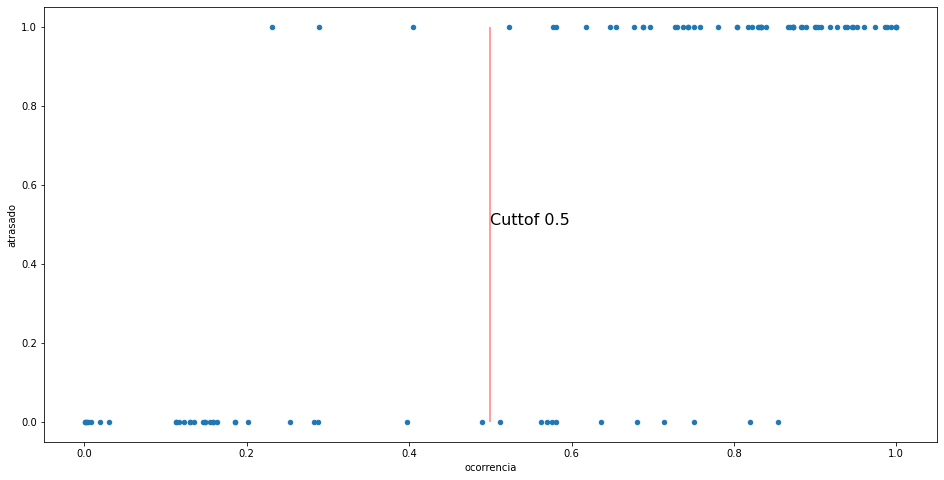

In [8]:
%matplotlib inline
df_probabilidades.sort_values(by='ocorrencia').plot(kind='scatter',x='ocorrencia', y='atrasado', figsize=(16,8))

plt.text(0.5, 0.5, 'Cuttof 0.5',size=16)
plt.vlines(x=0.5,colors='r',alpha=0.5,ymin=0,ymax=1)

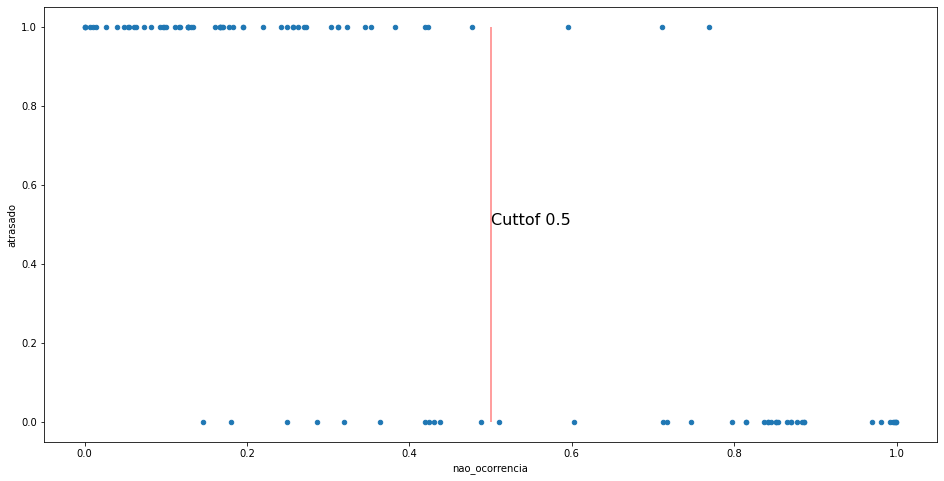

In [9]:
%matplotlib inline
df_probabilidades.sort_values(by='nao_ocorrencia').plot(kind='scatter',x='nao_ocorrencia', y='atrasado', figsize=(16,8))

plt.text(0.5, 0.5, 'Cuttof 0.5',size=16)
plt.vlines(x=0.5,colors='r',alpha=0.5,ymin=0,ymax=1)

In [10]:
Y_Predicted = model.predict(variaveisIndependentes)

## Medindo o desempenho do modelo

### Matriz Confusão

* A matriz de confusão para um modelo de regressão logística binária é uma tabela 2x2, que apresenta as seguintes informações:

    * Verdadeiros positivos (`VP`): casos em que o modelo previu corretamente a classe positiva (1) e a observação real também era positiva (1).
    * Falsos positivos (`FP`): casos em que o modelo previu a classe positiva (1), mas a observação real era negativa (0).
    * Falsos negativos (`FN`): casos em que o modelo previu a classe negativa (0), mas a observação real era positiva (1).
    * Verdadeiros negativos (`VN`): casos em que o modelo previu corretamente a classe negativa (0) e a observação real também era negativa (0).

* A nossa matriz que contêm 2 classes pode ser interpretada da seguinte maneira:

    * A diagonal principal contém o número de amostras que foram classificadas corretamente.
    * A célula (`0`,`1`) que equivale a primeira linha segunda coluna, contém o número de amostras que pertencem a classe `0` mas foram classificadas como pertencentes a classe `1`
    * As linhas representam as classes reais, enquanto as colunas representam as classes preditas.

In [11]:
cm = confusion_matrix(variavelDependente, Y_Predicted)

Text(0.05, 1.1, 'FN')

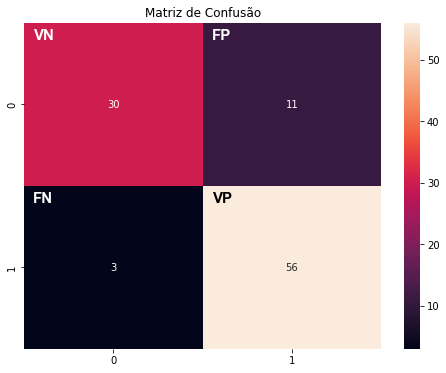

In [12]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='.3g' )
plt.title('Matriz de Confusão')
VN='VN'
VP='VP'
FN='FN'
FP='FP'

font = {'family': 'Arial', 'size': 14,'color': 'white','weight':'bold'}
plt.text(0.05, 0.1, VN, size = 15,fontdict=font)

fontVP = {'family': 'Arial', 'size': 14,'color': 'black','weight':'bold'}
plt.text(1.05, 1.1, VP, size = 15,fontdict=fontVP)

font = {'family': 'Arial', 'size': 14,'color': 'white','weight':'bold'}
plt.text(1.05, 0.1, FP, size = 15,fontdict=font)

font = {'family': 'Arial', 'size': 14,'color': 'white','weight':'bold'}
plt.text(0.05, 1.1, FN, size = 15,fontdict=font)


### Acuracy

$$acurácia = \frac{VP \ + \ VN}{VP \ + \ VN \ + \ FP \ + \ FN}$$

* A acurácia é uma medida de desempenho de um modelo de classificação que indica a proporção de observações que foram classificadas corretamente pelo modelo em relação ao total de observações avaliadas.
* Em outras palavras, a acurácia mede a capacidade do modelo de acertar as previsões.

In [13]:
acuracia = (30+56)/(100)
print("acuracia: ", acuracia)

acuracia:  0.86


In [14]:
acuracia = accuracy_score(variavelDependente, Y_Predicted)
print("Acurácia: ", acuracia)

Acurácia:  0.86


### Precision

* O precision (precisão) é uma métrica de avaliação de modelos de classificação binária que mede a proporção de observações classificadas como positivas pelo modelo que realmente são positivas.
* Em outras palavras, é a capacidade do modelo de evitar a classificação incorreta de uma observação como positiva.

$$precisao = \frac{VP}{VP + FP}$$

Onde:

* Verdadeiros positivos (VP) são as observações classificadas corretamente como positivas pelo modelo.
* Falsos positivos (FP) são as observações classificadas incorretamente como positivas pelo modelo.


In [15]:
precisao = 56 / (56 + 11)
print("precisao: ", precisao)

precisao:  0.835820895522388


In [16]:
precision_score(variavelDependente, Y_Predicted)

0.835820895522388

### Recall

* O recall (ou sensibilidade) é uma métrica de avaliação de modelos de classificação binária que mede a proporção de observações positivas que foram corretamente identificadas pelo modelo.
* Em outras palavras, é a capacidade do modelo de detectar corretamente as observações positivas.

$$recall = \frac{VP}{VP + FN}$$

* Onde:
    * Verdadeiros positivos (VP) são as observações classificadas corretamente como positivas pelo modelo.
    * Falsos negativos (FN) são as observações classificadas incorretamente como negativas pelo modelo.

In [17]:
recall = 56 / (56 + 3)
print("Recall: ", recall)

Recall:  0.9491525423728814


In [18]:
recall_score(variavelDependente, Y_Predicted)

0.9491525423728814

### F1 Score

* O F1-score é uma medida que combina a precisão (precision) e o recall (sensibilidade) em uma única métrica, para avaliar o desempenho de um modelo de classificação binária.
* Ele é a média harmônica da precisão e do recall, e é calculado pela seguinte fórmula:

$$F1 = 2 \ \times \ \frac{precision \ \times \ recall}{precision \ + \ recall}$$

* O F1-score considera tanto a capacidade do modelo de evitar classificações incorretas (precision) quanto a capacidade de detectar corretamente observações positivas (recall).
* O resultado é uma métrica que varia entre 0 e 1, onde 1 representa o melhor desempenho possível.

In [19]:
F1 = 2 * ((precisao * recall)/(precisao + recall))
print("F1: ", F1)

F1:  0.888888888888889


In [20]:
f1_score(variavelDependente, Y_Predicted)

0.888888888888889

## Especificidade

* A especificidade é uma medida de desempenho de um modelo de classificação binária que indica a proporção de verdadeiros negativos (VN) que foram corretamente classificados em relação ao total de negativos. 
* Em outras palavras, a especificidade é a proporção de VN que foram classificados como negativos pelo modelo.

* A fórmula para calcular a especificidade é:

 $$Especificidade = \ \frac{VN}{FP+VN}$$

* Onde:
    * $VN$ (verdadeiros negativos) é o número de amostras que foram classificadas como negativas pelo modelo e que realmente são negativas;
    * $FP$ (falsos positivos) é o número de amostras que foram classificadas como positivas pelo modelo, mas que na verdade são negativas.

In [21]:
Especificidade = ((20)/(21 + 20))
print("Especificidade: ", Especificidade)

Especificidade:  0.4878048780487805


### Classification Report

* O classification_report é uma função de avaliação de modelos de classificação em scikit-learn, uma biblioteca de aprendizado de máquina em Python.
* A função gera um relatório de métricas de avaliação do modelo para cada classe do problema de classificação.

* O relatório inclui as seguintes métricas de avaliação para cada classe:
    * Precisão (precision): a proporção de exemplos classificados corretamente como positivos entre todos os exemplos classificados como positivos.
    * Recall (sensibilidade): a proporção de exemplos classificados corretamente como positivos entre todos os exemplos que realmente são positivos.
    * F1-score: a média harmônica entre a precisão e o recall. É uma medida que combina a precisão e o recall em uma única métrica.
    * Suporte (support): o número de exemplos em cada classe.

In [22]:
print(classification_report(variavelDependente, Y_Predicted))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81        41
           1       0.84      0.95      0.89        59

    accuracy                           0.86       100
   macro avg       0.87      0.84      0.85       100
weighted avg       0.87      0.86      0.86       100



#### Curva ROC

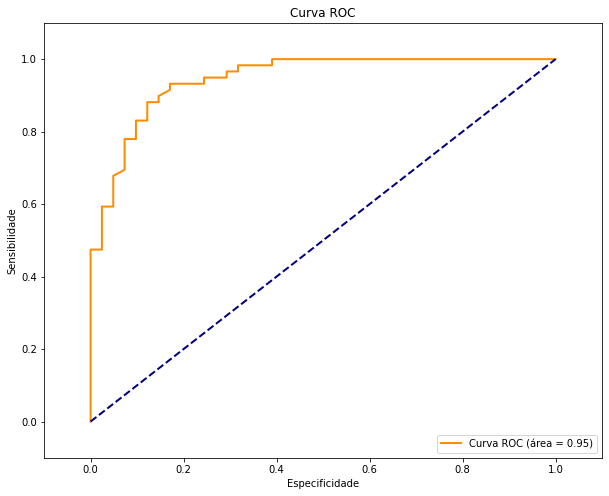

roc score 0.9454319966928483


In [23]:
# calcula a curva ROC
fpr, tpr, thresholds = roc_curve(variavelDependente, probabilidades[:,1])
roc_auc = auc(fpr, tpr)

# plota a curva ROC
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('Especificidade')
plt.ylabel('Sensibilidade')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
print('roc score', roc_auc_score(variavelDependente,probabilidades[:,1]))


### Sensibilidade vs Especificidade

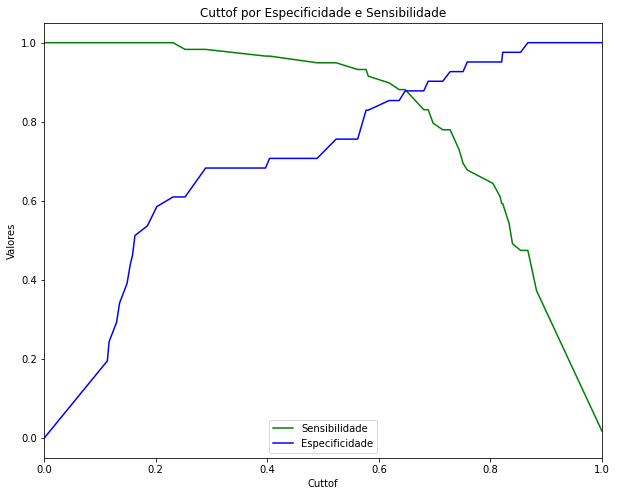

In [24]:
especificidade = []
sensibilidade = []
for cuttof in thresholds:
    y_pred_bin = (df_probabilidades['ocorrencia']>=cuttof).astype(int)
    VN, FP, FN, VP = confusion_matrix(variavelDependente, y_pred_bin).ravel()
    especificidade.append(VN / (FP + VN))
    sensibilidade.append(VP / (VP+FN)) 

fig, ax = plt.subplots(1,figsize=(10,8))
sns.lineplot(x=thresholds,y=sensibilidade,color='g',ax=ax,label='Sensibilidade')
sns.lineplot(x=thresholds,y=especificidade,color='b',ax=ax,label='Especificidade')
ax.set_title('Cuttof por Especificidade e Sensibilidade')
ax.set_xlabel('Cuttof')
ax.set_ylabel('Valores')
ax.set_xlim(xmin=0,xmax=1)
ax.legend()

## Referências
[1] Capítulo 13 do livro: FÁVERO, Luiz Paulo; BELFIORE, Patrícia. `Manual de análise de dados: estatística e modelagem multivariada com Excel®, SPSS® e Stata®`. Elsevier Brasil, 2017.

[2] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

[3] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

[4]  https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

[5] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

[6] https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn-metrics-classification-report


## Autores

<a href="https://www.linkedin.com/in/eduardopecora/" target="_blank">Eduardo Pecora</a>

<a href="https://www.linkedin.com/in/hesauhugocavalcanti/" target="_blank">Hesau Hugo</a>

## Log de modificações

| Data | Versão | Modificado por | Descrição |
| -----------| ------- | ---------- | ---------------------------------- |
| 17-04-2023       | 1.0     | Hesau Hugo    | Inicial               |
